In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

In [2]:
image_size = (32, 32)  

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=15, width_shift_range=0.1,
                                   height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32 

train_generator = train_datagen.flow_from_directory('/Users/harsh/Downloads/Dataset/Train', target_size=image_size, 
                                                    batch_size=batch_size, class_mode='binary')

validation_generator = validation_datagen.flow_from_directory('/Users/harsh/Downloads/Dataset/Validation', 
                                                              target_size=image_size, 
                                                              batch_size=batch_size, class_mode='binary')

test_generator = test_datagen.flow_from_directory('/Users/harsh/Downloads/Dataset/Test', target_size=image_size, 
                                                  batch_size=batch_size, class_mode='binary')


Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [4]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [5]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

history = model.fit(train_generator, epochs=50, validation_data=validation_generator,
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/50
4376/4376 [==============================] - 139s 32ms/step - loss: 0.5646 - accuracy: 0.6993 - val_loss: 0.5039 - val_accuracy: 0.7504
Epoch 2/50
   5/4376 [..............................] - ETA: 2:20 - loss: 0.5326 - accuracy: 0.7125

/Users/harsh/Apps/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4376/4376 [==============================] - 139s 32ms/step - loss: 0.5032 - accuracy: 0.7480 - val_loss: 0.4742 - val_accuracy: 0.7670
Epoch 3/50
4376/4376 [==============================] - 137s 31ms/step - loss: 0.4764 - accuracy: 0.7677 - val_loss: 0.4481 - val_accuracy: 0.7858
Epoch 4/50
4376/4376 [==============================] - 139s 32ms/step - loss: 0.4602 - accuracy: 0.7789 - val_loss: 0.4386 - val_accuracy: 0.7916
Epoch 5/50
4376/4376 [==============================] - 139s 32ms/step - loss: 0.4453 - accuracy: 0.7875 - val_loss: 0.4234 - val_accuracy: 0.8030
Epoch 6/50
4376/4376 [==============================] - 140s 32ms/step - loss: 0.4347 - accuracy: 0.7945 - val_loss: 0.4107 - val_accuracy: 0.8137
Epoch 7/50
4376/4376 [==============================] - 138s 32ms/step - loss: 0.4249 - accuracy: 0.8010 - val_loss: 0.4214 - val_accuracy: 0.8064
Epoch 8/50
4376/4376 [==============================] - 138s 32ms/step - loss: 0.4188 - accuracy: 0.8055 - val_loss: 0.4299 - val

In [36]:
model.load_weights('best_model.h5')

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc * 100:.2f}%')

341/341 [==============================] - 7s 20ms/step - loss: 0.4240 - accuracy: 0.8074
Test accuracy: 80.74%


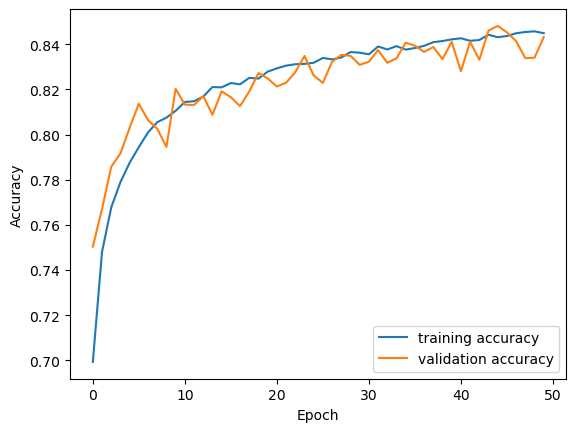

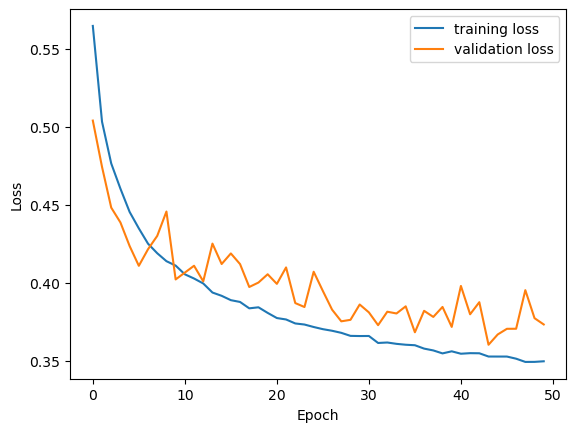

In [37]:
# Plot training history
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [21]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("Real")
    else:
        print("Fake")



In [32]:
predict_image('/Users/harsh/Downloads/Dataset/Validation/Real/real_0.jpg')
predict_image('/Users/harsh/Downloads/Dataset/Validation/Fake/fake_0.jpg')

1/1 [==============================] - 0s 10ms/step
Real
1/1 [==============================] - 0s 8ms/step
Fake


In [33]:
predict_image('/Users/harsh/Downloads/Dataset/Test/Real/real_3.jpg')
predict_image('/Users/harsh/Downloads/Dataset/Test/Fake/fake_3.jpg')

1/1 [==============================] - 0s 12ms/step
Real
1/1 [==============================] - 0s 10ms/step
Fake


In [34]:
predict_image('/Users/harsh/Downloads/Dataset/Test/Real/real_2.jpg')
predict_image('/Users/harsh/Downloads/Dataset/Test/Fake/fake_2.jpg')

1/1 [==============================] - 0s 14ms/step
Fake
1/1 [==============================] - 0s 8ms/step
Fake
